In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
#import libraries

import keras
from keras.models import Model
from keras.layers import Dense, Input, Flatten, Lambda
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import load_model

In [3]:
IMAGE_SIZE = [224, 224]

TRAIN_PATH = 'dataset/train'
TEST_PATH = 'dataset/test'

In [6]:
vgg = VGG16(input_shape= IMAGE_SIZE +[3],
            include_top=False,
            weights="imagenet")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
#Do not train VGG16 Layers.

for layer in vgg.layers:
  layer.trainable = False

In [12]:
''' Finding Number of classes in our train test folder'''

folders = glob(pathname= 'dataset/train/*')
folders

['dataset/train/ViratKohli',
 'dataset/train/RohitSharma',
 'dataset/train/MSDhoni']

In [27]:
print(len(folders))

3


In [28]:
x = Flatten()(vgg.output)


last_layer_of_prediction = Dense(4, activation= 'softmax')(x)

model = Model(inputs = vgg.input, outputs = last_layer_of_prediction)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
print(len(TEST_PATH))

12


In [31]:
model.compile(optimizer = 'adam',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

In [29]:
'''Now we will be doing image augmentation so that we
have multiple images to be be trained for better results '''


train_datagen = ImageDataGenerator(rescale = 1./ 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./ 255)

training_datagen = train_datagen.flow_from_directory(TRAIN_PATH,
                                                     target_size = (224, 224),
                                                     batch_size = 24,
                                                     class_mode = 'categorical')


testing_datagen = test_datagen.flow_from_directory(TEST_PATH,
                                                     target_size = (224, 224),
                                                     batch_size = 24,
                                                     class_mode = 'categorical')

Found 22 images belonging to 4 classes.
Found 6 images belonging to 4 classes.


In [25]:
print(len(training_datagen))

1


In [36]:
#Train my Transfer Learning Model

r = model.fit(
    training_datagen,
    validation_data=  testing_datagen,
    epochs = 5,

)

# Add this code to check the number of batches in testing_datagen
print(len(testing_datagen))

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.6364 - loss: 0.8463 - val_accuracy: 0.5000 - val_loss: 1.2762
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5909 - loss: 0.7459 - val_accuracy: 0.6667 - val_loss: 1.7366
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.7273 - loss: 1.0754 - val_accuracy: 0.6667 - val_loss: 1.8903
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.7273 - loss: 1.0599 - val_accuracy: 0.6667 - val_loss: 1.8747
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.7727 - loss: 1.2889 - val_accuracy: 0.6667 - val_loss: 1.6019
1


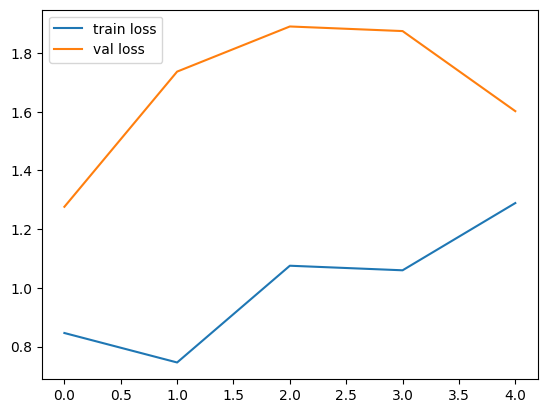

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [37]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
model.save('facefeatures_new_model.h5')

In [44]:
%cd /content/dataset

/content/dataset


In [47]:
!zip -r dataset.zip  /content/dataset

  adding: content/dataset/ (stored 0%)
  adding: content/dataset/.ipynb_checkpoints/ (stored 0%)
  adding: content/dataset/train/ (stored 0%)
  adding: content/dataset/train/.ipynb_checkpoints/ (stored 0%)
  adding: content/dataset/train/ViratKohli/ (stored 0%)
  adding: content/dataset/train/ViratKohli/209096-virat-kohli-7-pti.jpg (deflated 2%)
  adding: content/dataset/train/ViratKohli/289002.jpg (deflated 3%)
  adding: content/dataset/train/ViratKohli/HD-wallpaper-virat-kohli-ka-potrait-virat-kohli-ka-potrait-king-kohli-blue-sports.jpg (deflated 1%)
  adding: content/dataset/train/ViratKohli/virat-kohli-pictures-yc8dfpcjssp3s4se.jpg (deflated 1%)
  adding: content/dataset/train/ViratKohli/MSDhoni/ (stored 0%)
  adding: content/dataset/train/ViratKohli/MSDhoni/download.jpeg (deflated 2%)
  adding: content/dataset/train/ViratKohli/MSDhoni/vector-cartoon-ms-dhoni-hd-575intsd0dxp6iwi.jpg (deflated 5%)
  adding: content/dataset/train/ViratKohli/MSDhoni/183ce8a105c42748b50db4bf69a19263.jp

In [48]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>